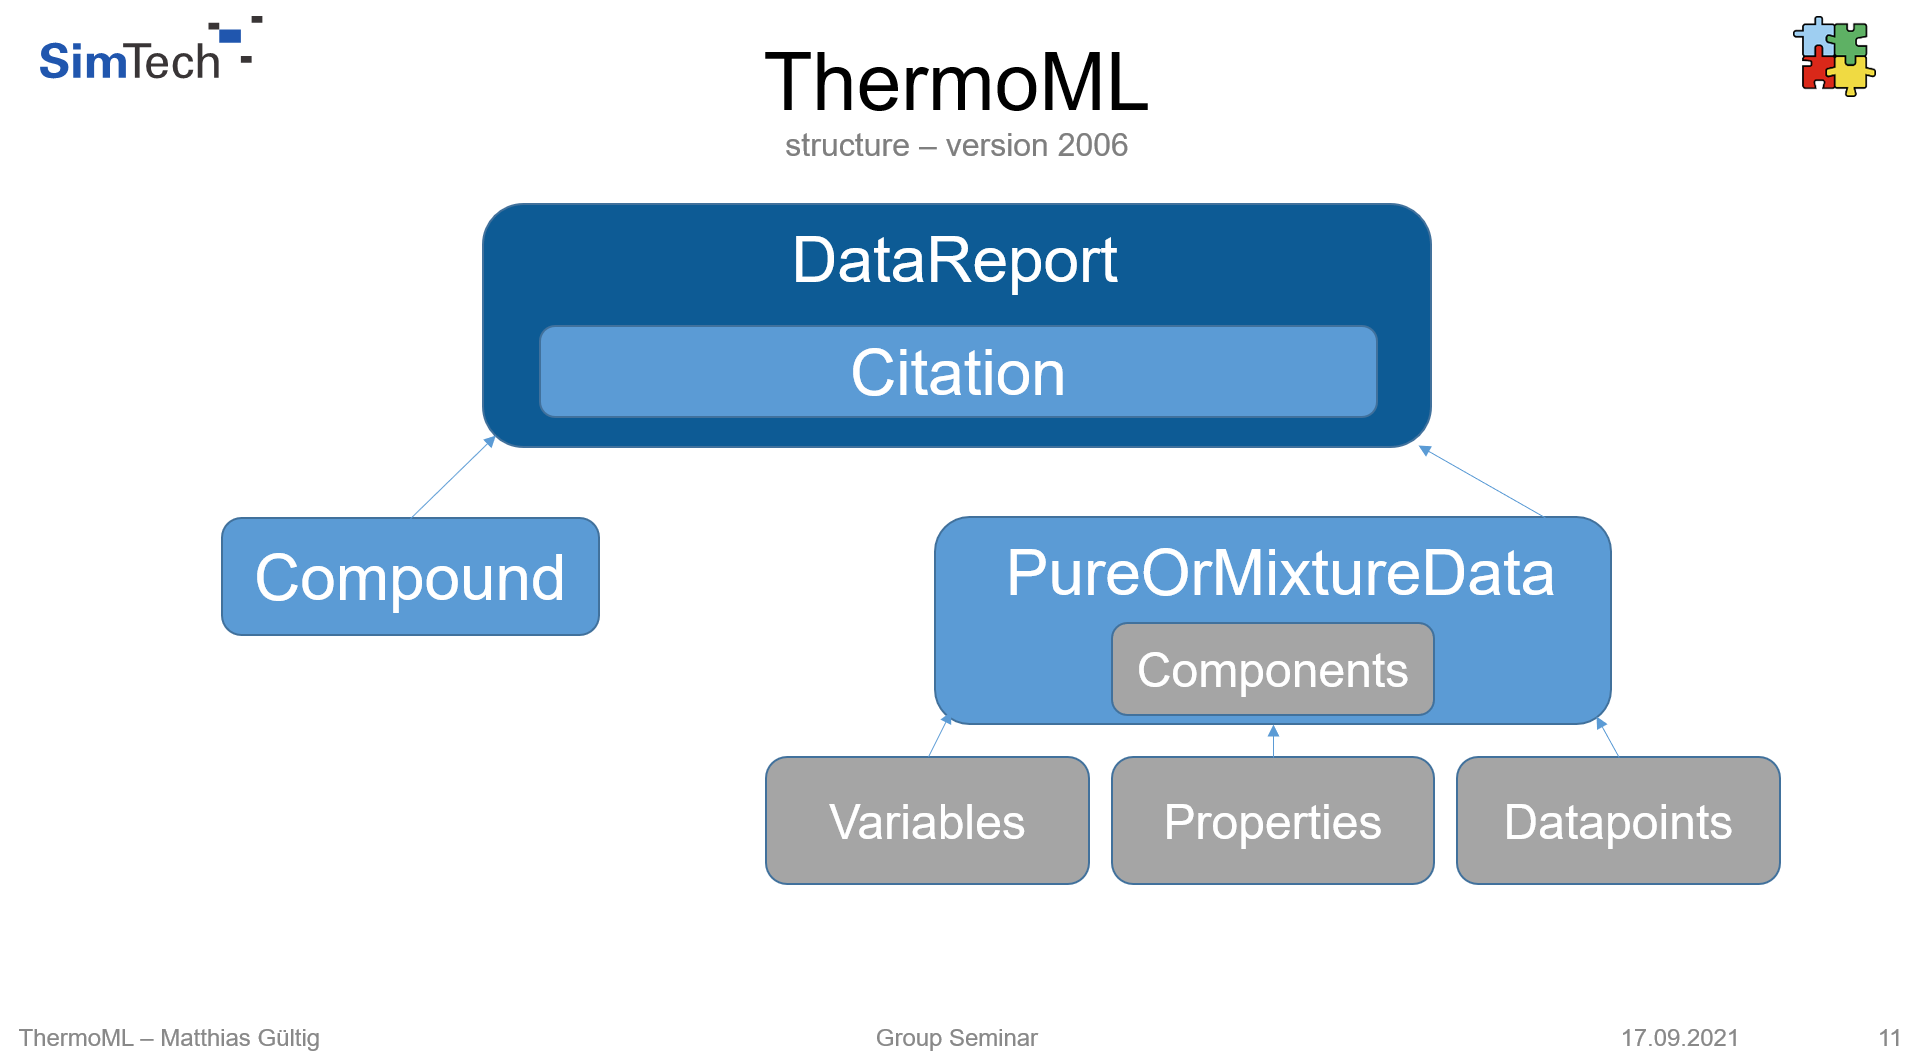

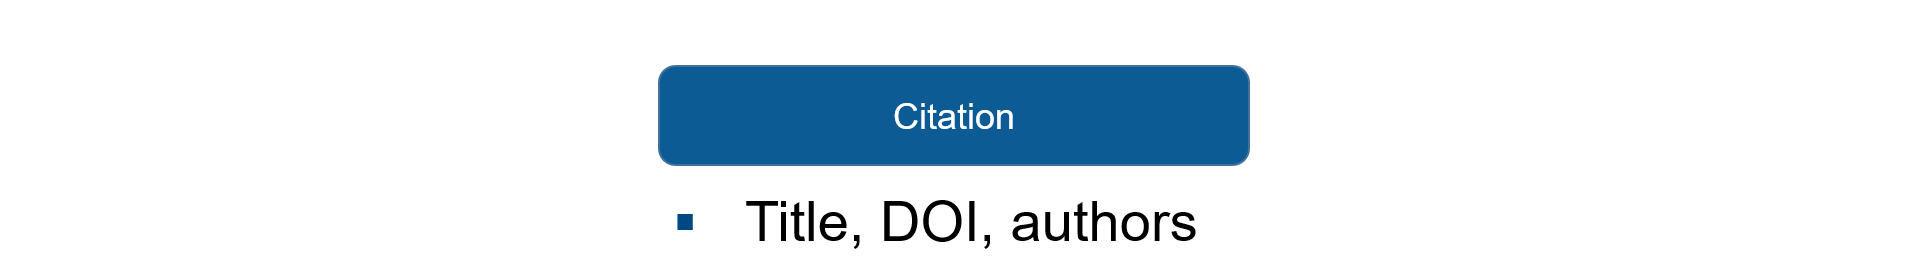

In [75]:
from pythermo.thermoml.core import DataReport 

dataReport = DataReport("Title of the referenced paper", "Thats our DOI", "author 1", "author 2", "author 3")

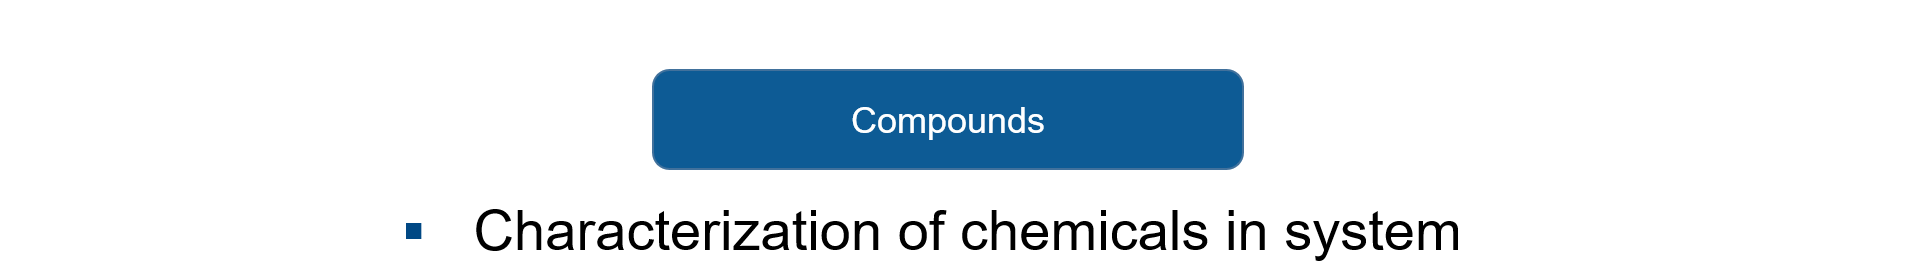

In [78]:
from pythermo.thermoml.core import Compound

comp1 = Compound(ID="id1", standardInchI = "standard inhchi", smiles = "smiles", standardInchIKey = "key", commonName="water")
comp2 = Compound(ID="id2", smiles = "smiles Code", commonName="ethanol")

comp1_ID = dataReport.addCompound(comp1)
comp2_ID = dataReport.addCompound(comp2)

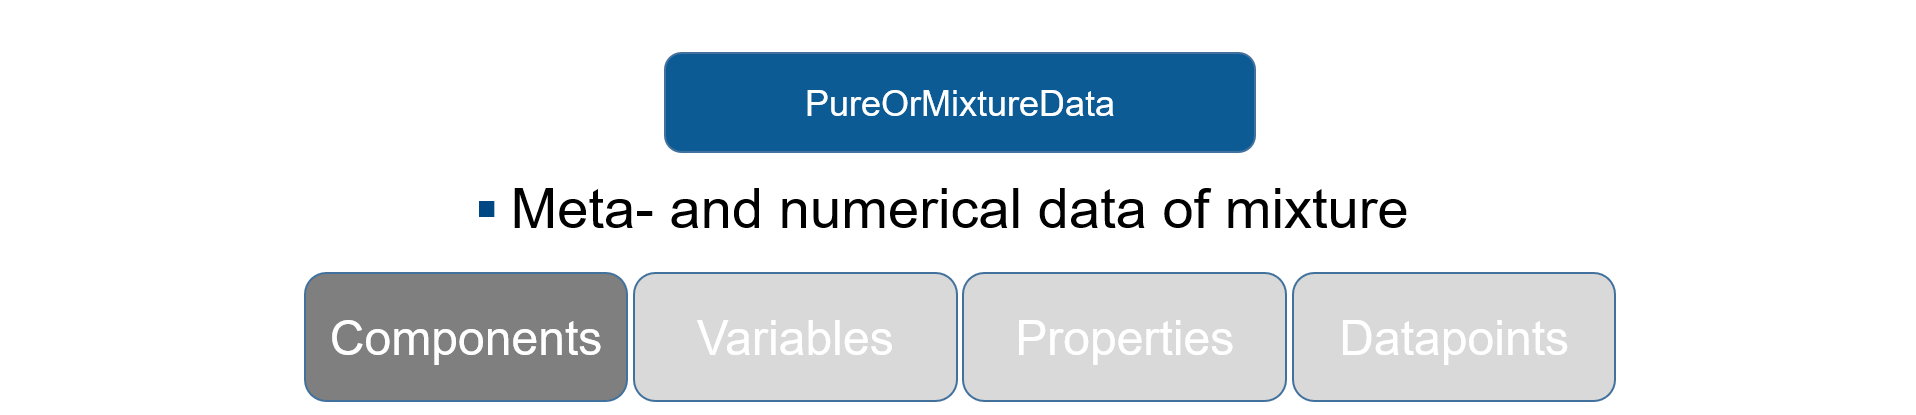

In [79]:
from pythermo.thermoml.core import PureOrMixtureData

experiment = PureOrMixtureData("experiment1", comp1_ID, comp2_ID)

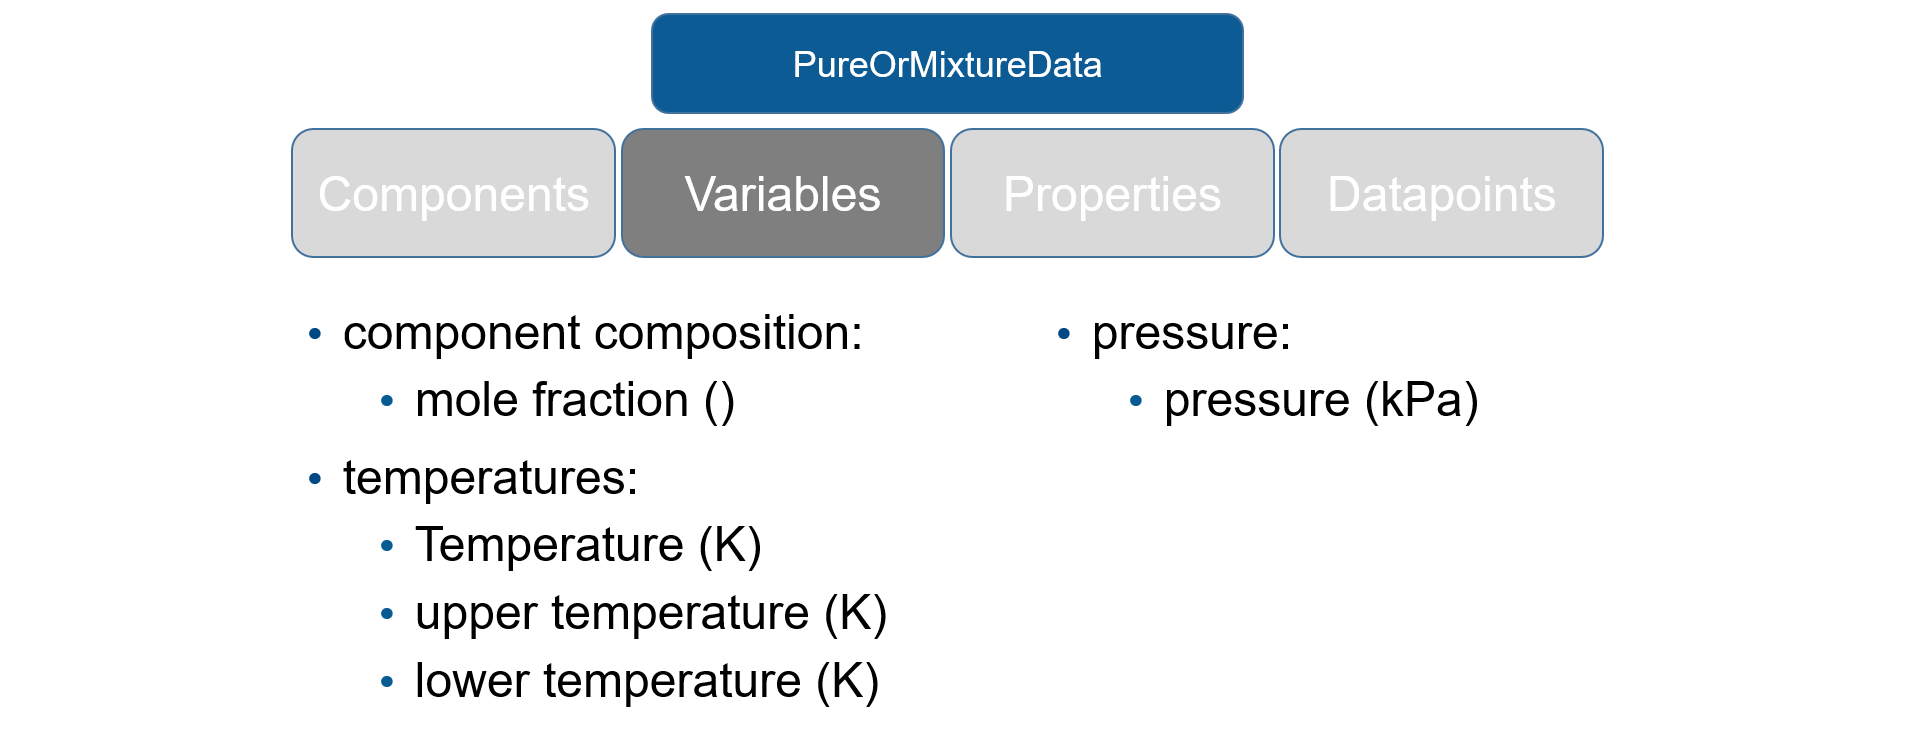

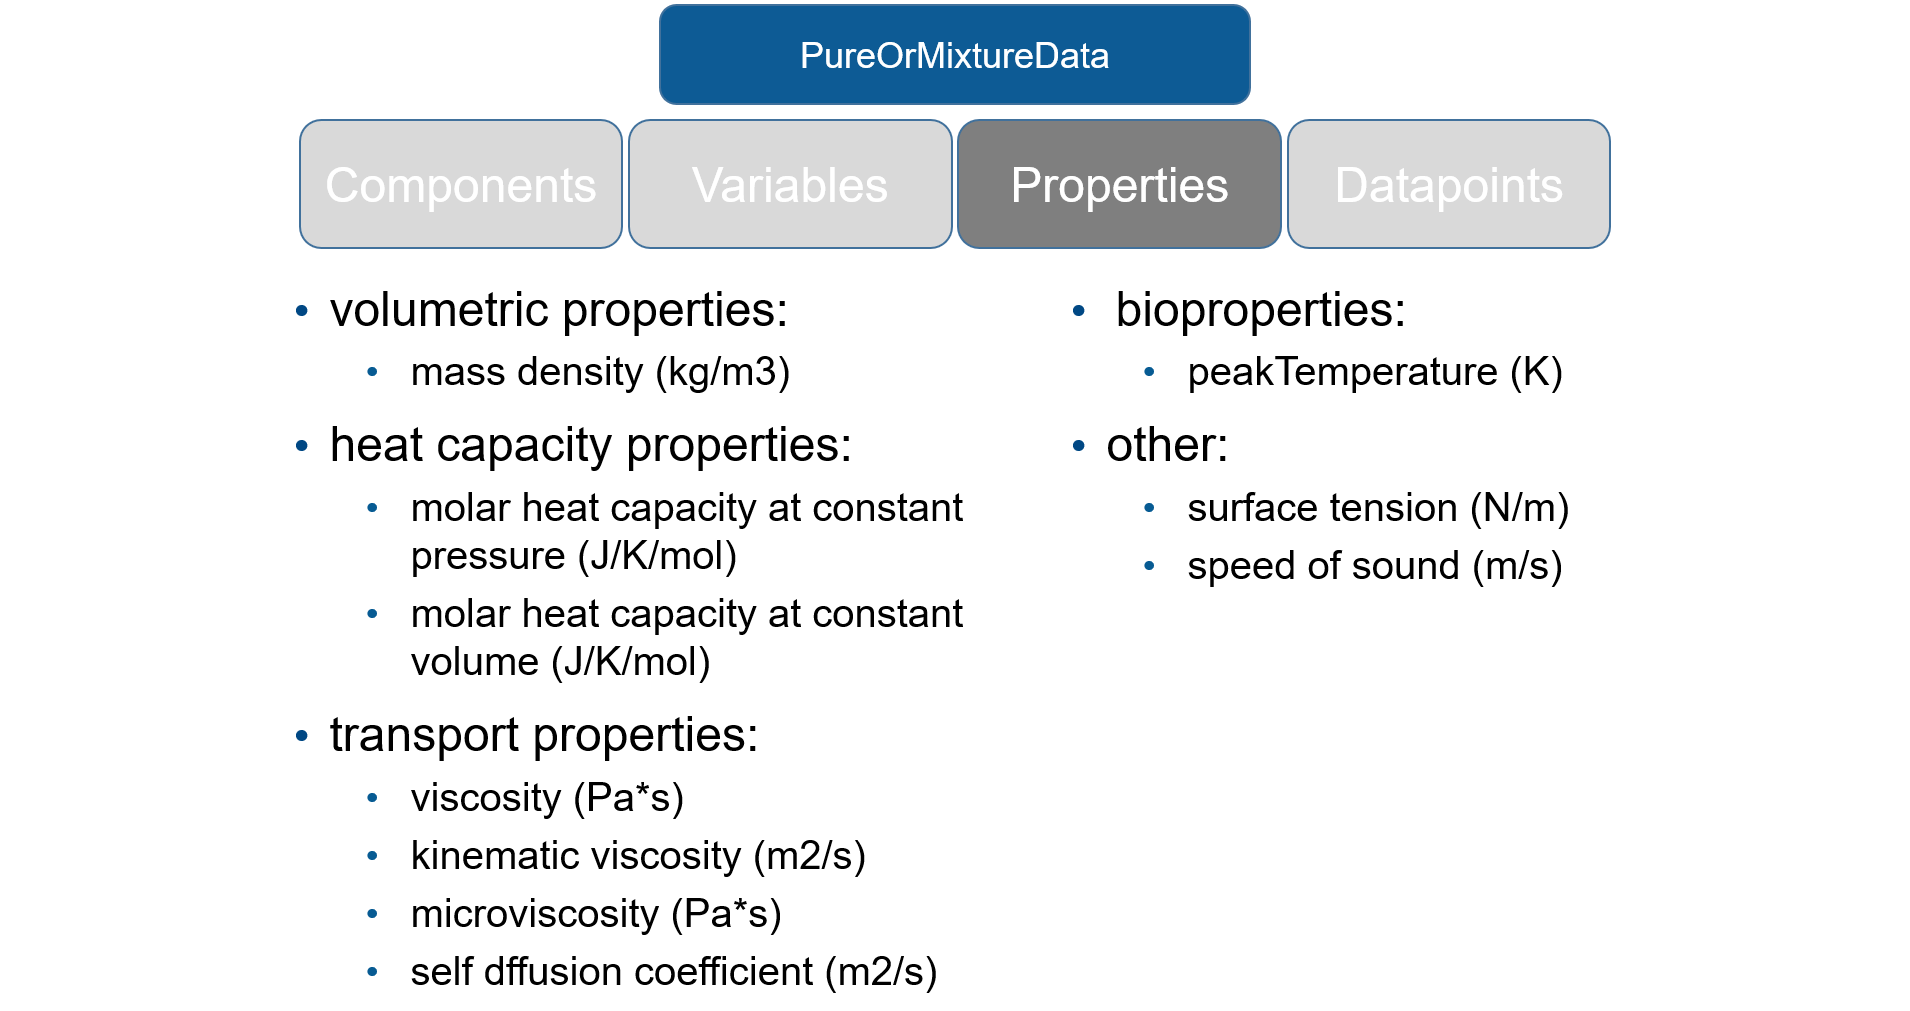

In [80]:
from pythermo.thermoml.props.transportproperties import Viscosity
from pythermo.thermoml.vars.componentcomposition import MoleFraction
from pythermo.thermoml.vars.temperature import Temperature


# property definitions
visc = Viscosity(ID='visc1', method="simulation")

# variable definitions
temp = Temperature(ID='temp1')
frac1 = MoleFraction(ID='moleFrac1', compoundID=comp1_ID)
frac2 = MoleFraction(ID='moleFrac2', compoundID=comp2_ID)

In [81]:
viscID = experiment.addProperty(prop=visc)

tempID = experiment.addVariable(variable=temp)
frac1ID = experiment.addVariable(variable=frac1)
frac2ID = experiment.addVariable(variable=frac2)

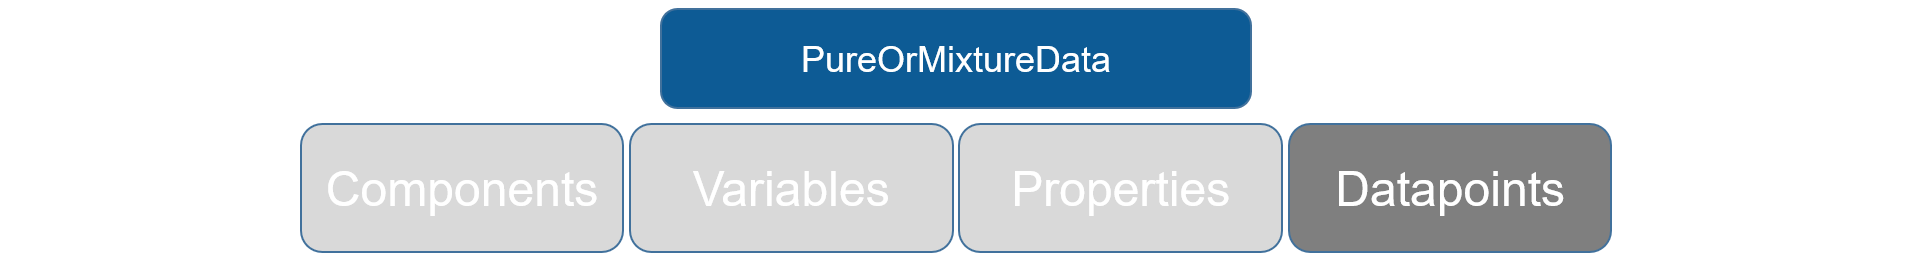

In [83]:
from pythermo.thermoml.core import DataPoint
measurementID = "meas1"

#variables
tempDataPoint = DataPoint(measurementID=measurementID, value=300.0, varID=tempID, uncertainty=0.1)
frac1DataPoint = DataPoint(measurementID=measurementID, value=0.5, varID=frac1ID, uncertainty=0.01)
frac2DataPoint = DataPoint(measurementID=measurementID, value=0.5, varID=frac2ID, uncertainty=0.01)

#property
viscDataPoint = DataPoint(measurementID=measurementID, value=0.001, propID=viscID, uncertainty=0.0001)

datapoints = [viscDataPoint, tempDataPoint, frac1DataPoint, frac2DataPoint]

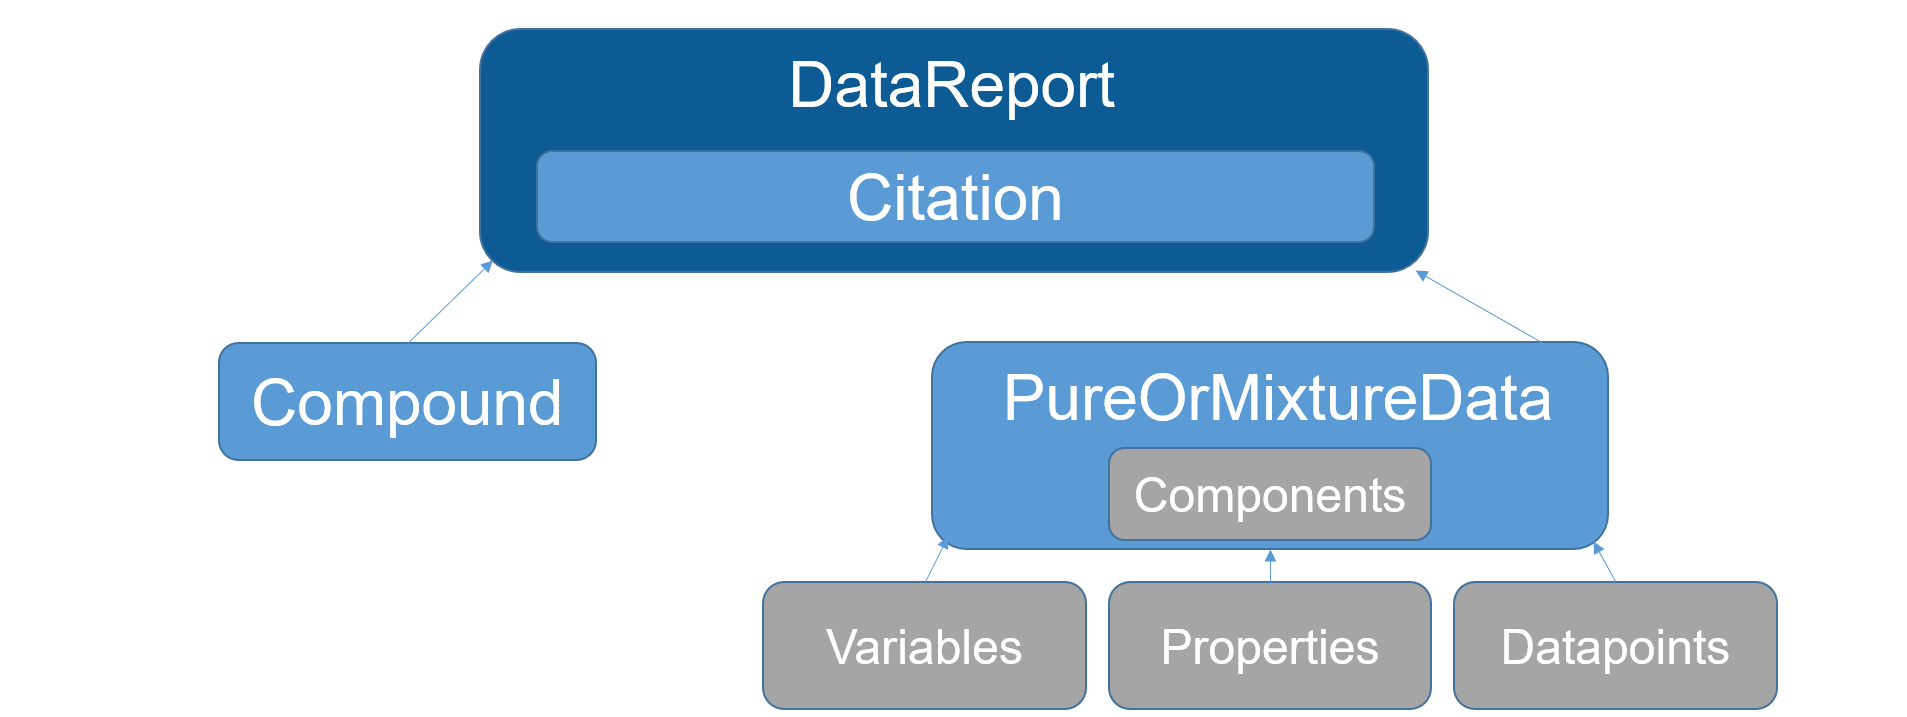

In [84]:
# add Measurement to experiment
experiment.addMeasurement(dataPoints=datapoints)

# add experiment to dataReport
dataReport.addPureOrMixtureData(experiment)

'experiment1'

In [85]:
print(dataRep)

{
    "_title": "Title of the referenced paper",
    "_DOI": "Thats our DOI",
    "_authors": {
        "_author0": "author 1",
        "_author1": "author 2",
        "_author2": "author 3"
    },
    "compounds": {
        "id1": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles",
            "_commonName": "water",
            "_Compound__type": "comp",
            "_ID": "id1"
        },
        "id2": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles Code",
            "_commonName": "ethanol",
            "_Compound__type": "comp",
            "_ID": "id2"
        }
    },
    "pureOrMixtureData": {
        "experiment1": {
            "_ID": "experiment1",
            "comps": [
                "id1",
                "id2"
            ],
            "_properties": {
                "visc1": {
                    "_propName": "Viscosity",
                    "_ID": "visc1",

In [86]:
from pythermo.thermoml.tools.readTools import readThermo
from pythermo.thermoml.tools.writeTools import writeThermo

writeThermo(dataReport, "testThermo")

In [87]:
from lxml import etree

x = etree.parse("testThermo.xml")
pretty_xml = etree.tostring(x, pretty_print=True, encoding=str)
print(pretty_xml)

<DataReport xmlns="http://www.iupac.org/namespaces/ThermoML" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.iupac.org/namespaces/ThermoML ThermoML.xsd">
  <Version>
    <nVersionMajor>4</nVersionMajor>
    <nVersionMinor>0</nVersionMinor>
  </Version>
  <Citation>
    <sAuthor>author 1</sAuthor>
    <sAuthor>author 2</sAuthor>
    <sAuthor>author 3</sAuthor>
    <sDOI>Thats our DOI</sDOI>
    <sTitle>Title of the referenced paper</sTitle>
  </Citation>
  <Compound>
    <RegNum>
      <nOrgNum>id1</nOrgNum>
    </RegNum>
    <sstandardInchI>standard inhchi</sstandardInchI>
    <sstandardInchIKey>key</sstandardInchIKey>
    <sCommonName>water</sCommonName>
    <sSmiles>smiles</sSmiles>
  </Compound>
  <Compound>
    <RegNum>
      <nOrgNum>id2</nOrgNum>
    </RegNum>
    <sCommonName>ethanol</sCommonName>
    <sSmiles>smiles Code</sSmiles>
  </Compound>
  <PureOrMixtureData>
    <nPureOrMixtureDataNumber>experiment1</nPureOrMixtureDataNumber>
    <Co

In [88]:
dataRep = readThermo("testThermo.xml")
print(dataRep)

{
    "_title": "Title of the referenced paper",
    "_DOI": "Thats our DOI",
    "_authors": {
        "_author0": "author 1",
        "_author1": "author 2",
        "_author2": "author 3"
    },
    "compounds": {
        "id1": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles",
            "_commonName": "water",
            "_Compound__type": "comp",
            "_ID": "id1"
        },
        "id2": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles Code",
            "_commonName": "ethanol",
            "_Compound__type": "comp",
            "_ID": "id2"
        }
    },
    "pureOrMixtureData": {
        "experiment1": {
            "_ID": "experiment1",
            "comps": [
                "id1",
                "id2"
            ],
            "_properties": {
                "visc1": {
                    "_propName": "Viscosity",
                    "_ID": "visc1",